In [1]:
# 分布图：单个变量的数值分布，密度图、直方图、箱型图、堆叠直方图

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel('order2019.xlsx')

In [3]:
data.head()

,id,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
0,1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
1,2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
2,3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
3,4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
4,5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [4]:
data['orderAmount'].head()

0    272.51
1    337.93
2    905.68
3    786.27
4    550.77
Name: orderAmount, dtype: float64

(6.1, 5000)

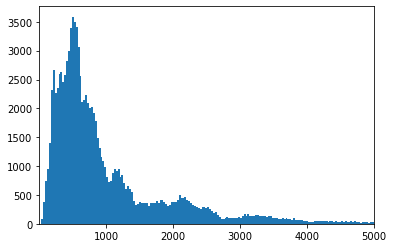

In [5]:
# 直方图：类别（数值）、频数（频率）
plt.hist(data['orderAmount'],bins=1000)
plt.xlim(data['orderAmount'].min(),5000)

In [6]:
# 箱型图：1、单个变量 2、加入比较变量

(0, 2000)

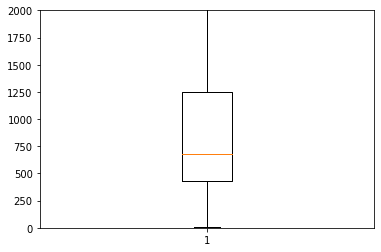

In [11]:
plt.boxplot(data['orderAmount']) # payment
plt.ylim(0,2000)

In [13]:
# 比较orderamount 和 payment 金额分布表现
data2 = data[['orderAmount','payment']].T
data2

,0,1,2,3,4,5,6,7,8,9,...,104547,104548,104549,104550,104551,104552,104553,104554,104555,104556
orderAmount,272.51,337.93,905.68,786.27,550.77,425.2,1764.37,499.41,1103.00,465.41,...,1544.96,280.39,633.77,597.41,206.92,186.37,138.81,2632.27,1206.76,3053.70
payment,272.51,337.93,891.23,688.88,542.51,425.2,1707.04,480.42,1050.95,465.41,...,1379.23,256.74,633.77,576.89,161.28,126.21,138.81,2632.27,1029.46,2982.26


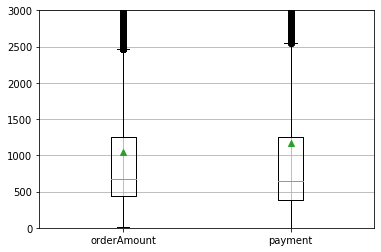

In [17]:
plt.boxplot(data2, showmeans=True, labels=data2.index.tolist())
plt.ylim(0,3000)
plt.grid()

In [18]:
data[data['payment']>data['orderAmount']]

,id,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
15,16,sys-2019-322802617,user-125220,PR000812,430.69,4223.476684,渠道-0530,Wech atMP,2019-01-01 07:59:45,2019-01-01 07:59:59,否
45,46,sys-2019-321496315,user-283798,PR000520,1052.36,9449.242956,渠道-0896,APP,2019-01-01 11:23:03,2019-01-01 11:23:17,否
65,66,sys-2019-355823490,user-258709,PR000927,358.94,3580.284755,渠道-9527,AP P,2019-01-01 12:31:55,2019-01-01 12:32:23,否
68,69,sys-2019-277578024,user-223627,PR000830,2331.25,22486.795449,渠道-0530,AP P,2019-01-01 12:37:41,2019-01-01 12:38:20,否
147,148,sys-2019-355060894,user-214122,PR000826,205.78,2044.275720,渠道-0007,APP,2019-01-01 14:44:49,2019-01-01 14:45:21,是
...,...,...,...,...,...,...,...,...,...,...,...
104454,104455,sys-2020-297258490,user-185944,PR000548,615.50,5828.118054,渠道-9527,APP,2020-01-01 18:53:17,2020-01-01 18:53:34,否
104462,104463,sys-2020-300346666,user-145319,PR000755,2326.08,20146.843121,渠道-0789,APP,2020-01-01 19:09:07,2020-01-01 19:09:20,是
104499,104500,sys-2020-259333238,user-141198,PR000784,284.61,2831.172018,渠道-9527,AP P,2020-01-01 20:45:37,2020-01-01 20:47:02,否
104512,104513,sys-2020-318418620,user-209226,PR000484,1890.46,18732.132402,渠道-0765,Wech atMP,2020-01-01 21:15:46,2020-01-01 21:15:59,否


In [8]:
# 离群值 > Q3+1.5*IQR，IQR=Q3-Q1
# 离群值 < Q1-1.5*IQR，IQR=Q3-Q1